## Project 3
Emily Wilbur 

In [15]:
import numpy as np
import matplotlib.pyplot as plt

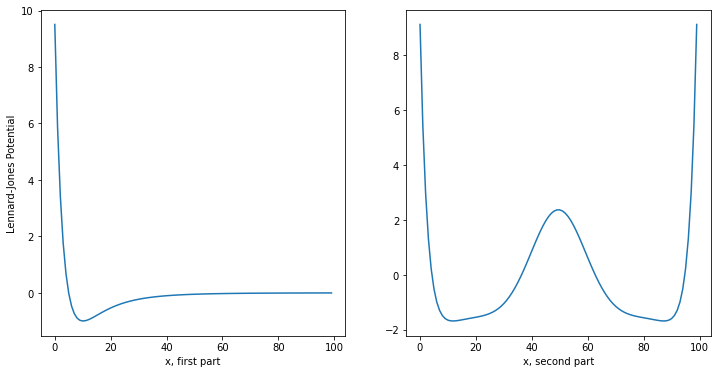

In [170]:
# (a)
# points: (N,3)−array of (x,y,z) coordinates for N points 
# distance(points): returns (N,N)−array of inter−point distances:
def distance( points ):
    displacement = points[:,np.newaxis] - points[np.newaxis,:]
    return np.sqrt( np.sum(displacement*displacement, axis=-1) )

# computing Lennard-Jones ~*energy*~
def LJ(sigma,epsilon): 
    def V( points ):
        r = distance(points)
        rij = np.where(r !=0)
        R = r[rij]
        vLJ = 4*epsilon*((sigma/R)**12 - (sigma/R)**6)
        V = np.sum((vLJ)/2) 
        return V
    return V
    
# Do some computations! Parts 1 and 2 
sigmaA = 3.401 # [A with a fun little hat]
epsilonA = 0.997 # [kJ/mol]
x = np.linspace(3,11,100)
listLJ1 = []
listLJ2 = []
for i in range(len(x)):
    X1 = np.array([[x[i], 0, 0],[0, 0, 0]])
    X2 = np.array([[x[i], 0, 0],[0, 0, 0],[14, 0, 0],[7, 3.2, 0]])
    LJ1 = LJ(sigmaA, epsilonA)(X1) # lennard-jones potential for part 1
    listLJ1.append(LJ1)            # list of lennard-jones potential for part 1
    LJ2 = LJ(sigmaA, epsilonA)(X2) # lennard-jones potential for part 2
    listLJ2.append(LJ2)            # list of lennard-jones potential for part 2
    
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(listLJ1)
plt.xlabel('x, first part')
plt.ylabel('Lennard-Jones Potential')
plt.subplot(1,2,2)
plt.plot(listLJ2)
plt.xlabel('x, second part')
plt.show;

In [166]:
# (b)
# bisection root finding function 
# x, n calls = bisection root(f,a,b,tolerance=1e−13)
def bisection_root(f,a,b,tolerance=10**(-13)):
    fa, fb = f(a), f(b)
    ncalls = 0 # open the counter for calls as a counter for how many times the loop runs
    n = int(np.ceil(np.log2((b-a)/tolerance)))       
    assert (np.sign(f(a)) != np.sign(f(b)))       
    for i in range(n):
        c_i = a + (b - a)/2
        fc = f(c_i)
        if np.sign(f(a)) == np.sign(fc):
            a = c_i
            fa = f(c_i)
        else:
            b = c_i
            fb = f(b)
        ncalls += 1 # count the loops
    return c_i, ncalls

# test it out
ab = np.array([2,6])
a = 2
b = 6
sigma = 3.401
epsilon = 0.997
V = LJ(sigma, epsilon)
(xb, nb) = bisection_root(lambda X : V(np.array([[X, 0, 0],[0,0,0]])), a, b)

In [167]:
# (c) 
# newton-rhapson root finding function
# x, n calls = newton root(f,df,x0,tolerance,max iterations)
def newton_root(f,df,x0,tolerance=10**(-12),maxiterations=100):
    ncalls = 0 # open the counter for calls as a counter for how many times the loop runs
    for i in range(maxiterations):
        x0 = x0 - f(x0)/df(x0)
        ncalls += 1
    return x0, ncalls

# try it out
sigma = 3.401
epsilon = 0.997
dv = lambda R : 4*epsilon*((6*sigma**6)/R**7 - (12*sigma**12)/R**13)
print(dv(2))
x0 = 2
(xc, nc) = newton_root(lambda X : V(np.array([[X, 0, 0],[0,0,0]])),dv,x0)
Vf = lambda X : V(np.array([[X, 0, 0],[0,0,0]]))

-13700.976175013506


In [ ]:
# (d)
# newton-rhapson w/ bisection, guaranteed convergence
# oof

In [84]:
from numpy import newaxis, fill_diagonal, sum, sqrt
NA = newaxis

# \grad_k V(\xx_k) = 4\epsilon \sum_{j\ne k} (6\sigma^6/r_{kj}^7 - 12\sigma^12/r_{kj}^13) u_{kj}
#                  = 4\epsilon \sum_{j=1}^N  (6\sigma^6/\tilde{r}_{kj}^7 - 12\sigma^12/\tilde{r}_{kj}^13) u_{kj}  
# u_{kk} = (0,0,0), \tilde{r}_{kk} = 1
def LJgradient(sigma, epsilon):

    def gradV(X):
        d = X[:,NA] - X[NA,:]        # (N,N,3) displacement vectors
        r = sqrt( sum(d*d,axis=-1) ) # (N,N)   distances
        
        fill_diagonal(r,1)          # Don't divide by zero
        u = d/r[:,:,NA]             # (N,N,3) unit vectors in direction of \xx_i - \xx_j
        
        T = 6*(sigma**6) * (r**-7) - 12*(sigma**12) * (r**-13) # NxN matrix of r-derivatives

        # Using the chain rule, we turn the (N,N)-matrix of r-derivatives into the (N,3)-array
        # of derivatives to Cartesian coordinates, i.e.:the gradient.
        return 4*epsilon*sum(T[:,:,NA] * u, axis=1)          

    return gradV

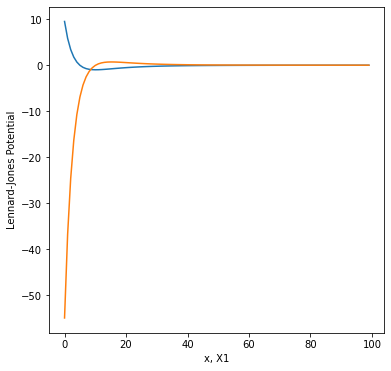

In [190]:
# (e) 
# looking at gradients of potential
# from part (a):

sigma = 3.401 # [A with a fun little hat]
epsilon = 0.997 # [kJ/mol]
x = np.linspace(3,11,100)
listLJ1grad = []
listLJ2grad = []
for i in range(len(x)):
    X1 = np.array([[x[i], 0, 0], [0, 0, 0]])
    X2 = np.array([[x[i], 0, 0], [0, 0, 0],[14, 0, 0],[7, 3.2, 0]])
    LJ1grad = LJgradient(sigma, epsilon)(X1) # lennard-jones potential gradient for part 1
    listLJ1grad.append(LJ1grad)              # list of lennard-jones potential gradient for part 1
    LJ2grad = LJgradient(sigma, epsilon)(X2) # lennard-jones potential gradient for part 2
    listLJ2grad.append(LJ2grad)              # list of lennard-jones potential gradient for part 2

plt.figure(figsize=(6,6))
plt.plot(listLJ1)
plt.plot(np.array(listLJ1grad)[:,0,0])
plt.xlabel('x, X1')
plt.ylabel('Lennard-Jones Potential')
plt.show;

In [174]:
# (f)
# line searching function
def linesearch(F, X0, d, alphamax, tolerance, maxiterations):
    a = lambda alpha : np.dot(d.flatten(), F(X0+alpha*d).flatten())
    (x, ncalls) = bisection_root(a, 0, alphamax, tolerance)
    return x, ncalls

# test 
sigma = 3.401 # [A with a fun little hat]
epsilon = 0.997 # [kJ/mol]
X0 = np.array([[4,0,0], [0,0,0], [14,0,0], [7,3.2,0]])
d = - LJgradient(sigma,epsilon)(X0)
alphamax = 1
alpha = linesearch(LJgradient(sigma,epsilon), X0, d, alphamax, 10**(-6), 1000)
print(alpha)

(0.4517068862915039, 20)


In [216]:
# (g) 
ArSt = np.load('ArStart.npz')

# Golden ratio minimizer
def golden_section_min(f,a,b,tolerance=10**(-3)):
    golden = (np.sqrt(5)+1)/2
    ncalls = 0
    x1 = a + (1-golden)*(b-a)
    f1 = f(x1)
    x2 = a + golden*(b-a)
    f2 = f(x2)
    while (b - a) > tolerance:
        if f(x1) > f(x2):
            a = x1
            x1 = x2
            f1 = f2
            x2 = a + golden*(b-a)
            f2 = f(x2)
        else:
            b = x2
            x2 = x1
            f2 = f1
            x1 = a + (1-golden)*(b-a)
            f1 = f(x1)
        ncalls += 1
    xopt = (b+a)/2
    return xopt, ncalls


# testing!
a = 2
b = 6
sigma = 3.401
epsilon = 0.997
X0 = np.array([[4,0,0], [0,0,0], [14,0,0], [7,3.2,0]])
d = - LJgradient(sigma,epsilon)(X0)
xx = X0 + alpha*d
alpha = golden_section_min(LJ(sigma,epsilon)(xx), a, b)
print(alpha)

ValueError: operands could not be broadcast together with shapes (2,) (4,3) 

In [ ]:
# (h)
# BFGS
def BFGS(f,gradf,X, tolerance = 10**(-6), maxiterations=10000):
    n = f.size
    x0 = X
    B = np.identity(n)@x0 # initialize B
    for k in range(maxiterations):
        
    
    return xopt, ncalls, converged